In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/home/illahi/ILAHI/winequality-red.csv")

In [3]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1054,8.2,0.640,0.27,2.00,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,6
1471,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6,5
1526,6.8,0.470,0.08,2.20,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6
902,7.4,0.635,0.10,2.40,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,7
184,6.7,0.620,0.21,1.90,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,6
1100,8.4,0.340,0.42,2.10,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6
174,7.3,0.380,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
145,8.1,0.670,0.55,1.80,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5
1485,7.0,0.655,0.16,2.10,0.074,8.0,25.0,0.99606,3.37,0.55,9.7,5
283,8.9,0.400,0.32,5.60,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,7


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
import seaborn as sns
cor=df.corr()

<Axes: >

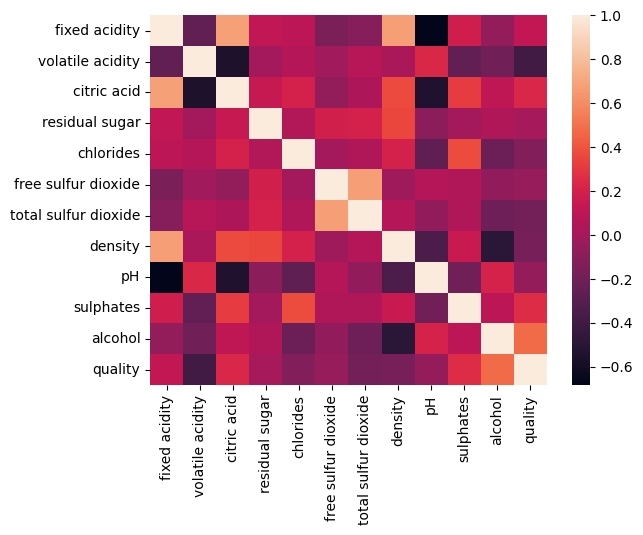

In [8]:
sns.heatmap(cor)

In [9]:
import matplotlib.pyplot as plt

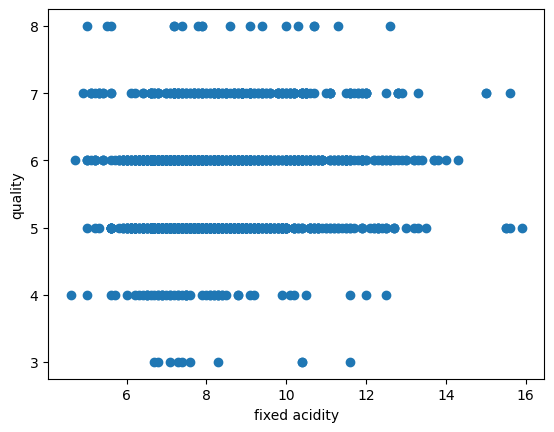

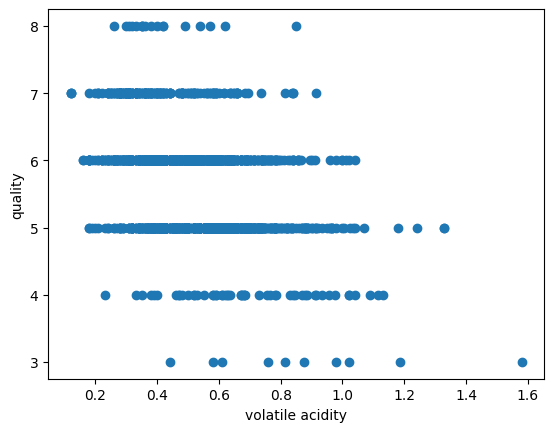

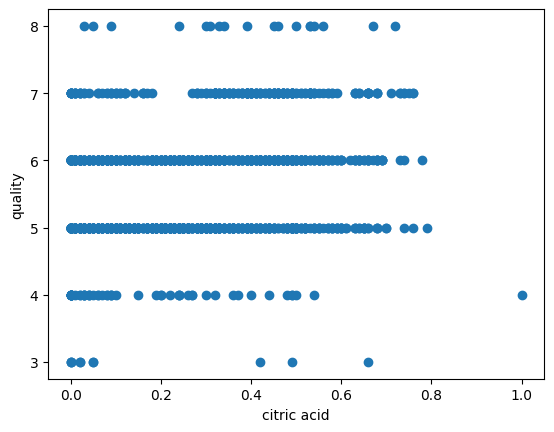

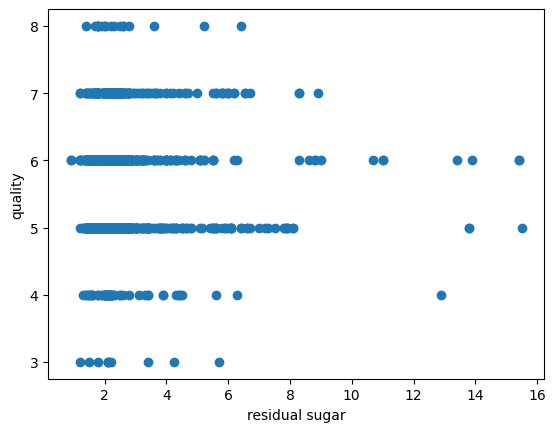

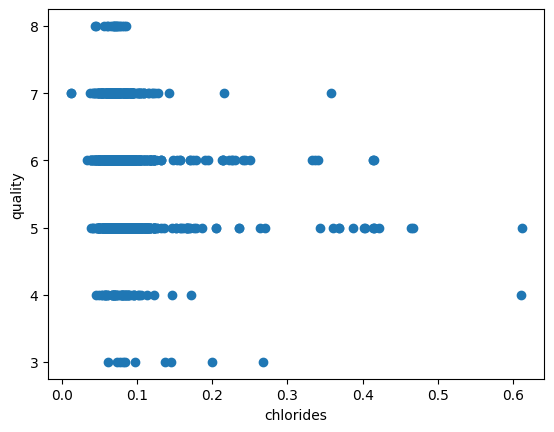

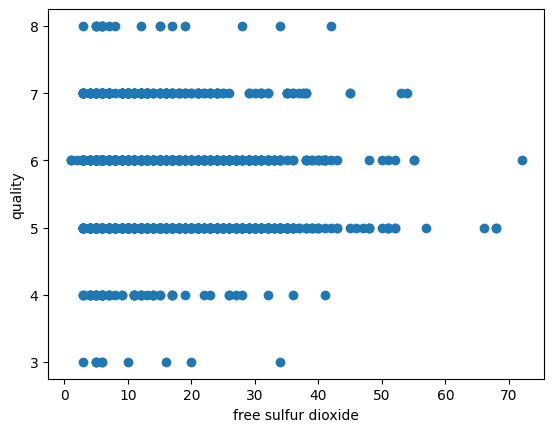

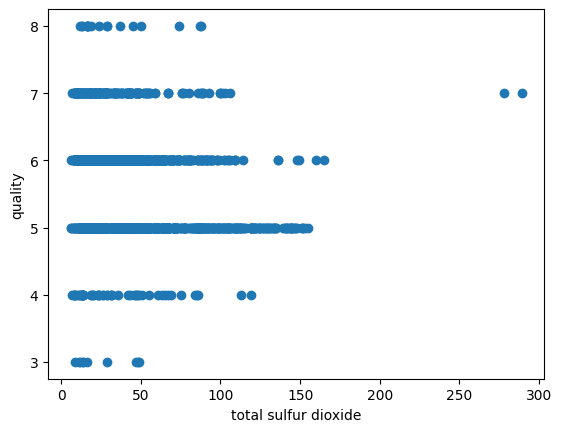

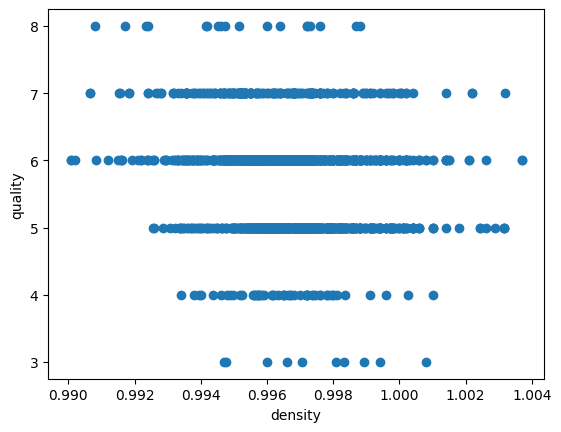

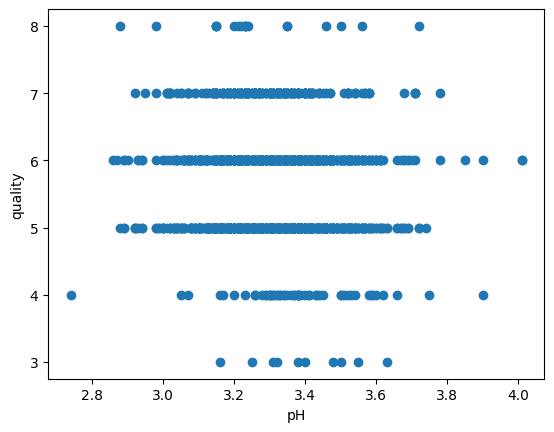

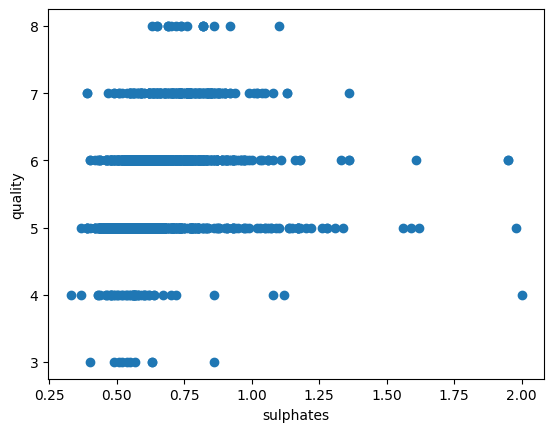

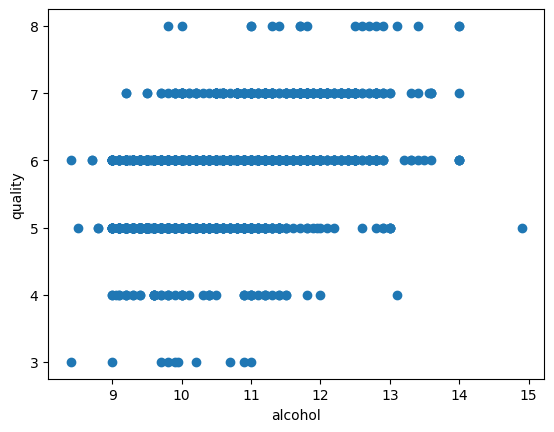

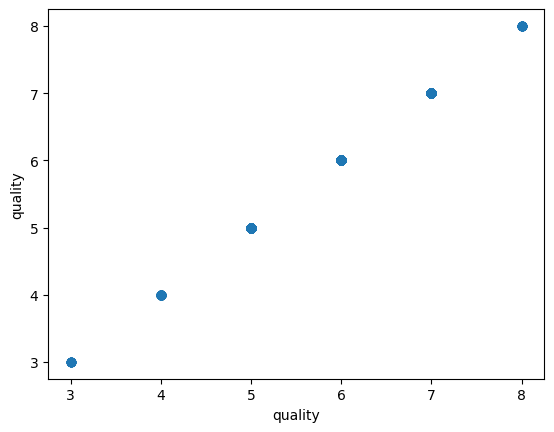

In [10]:
for i in df.columns:
    plt.scatter(df[i],df["quality"])
    plt.xlabel(i)
    plt.ylabel("quality")
    plt.show()
    # print("_"*30)

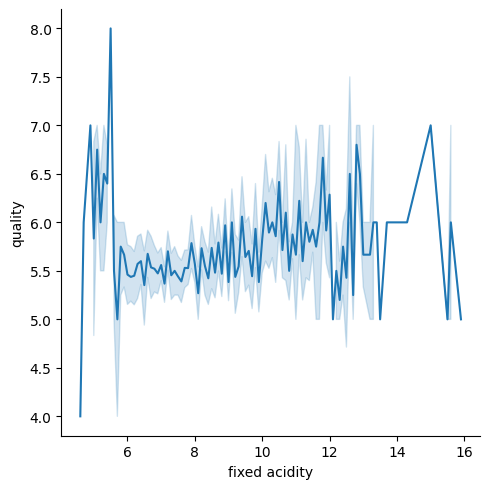

In [11]:
sns.relplot(data=df,x=df["fixed acidity"],y="quality",kind="line")

<Axes: xlabel='quality', ylabel='pH'>

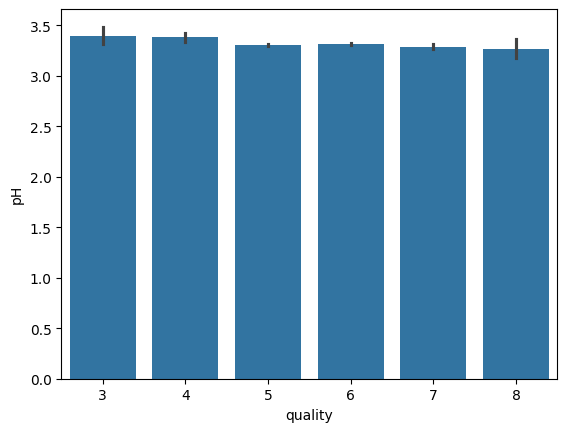

In [12]:
sns.barplot(data=df,y=df["pH"],x=df["quality"])

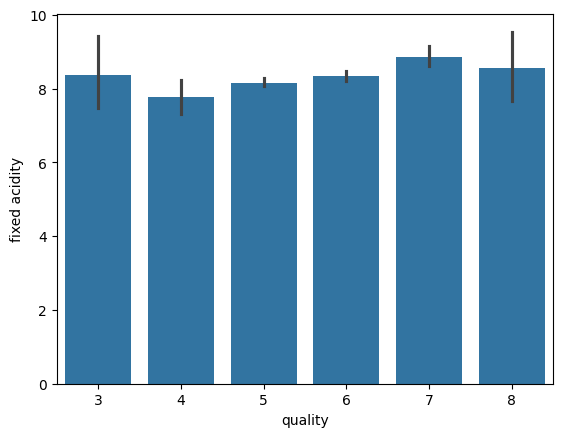

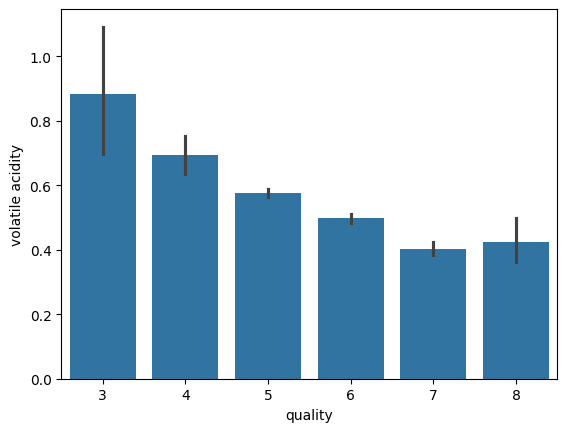

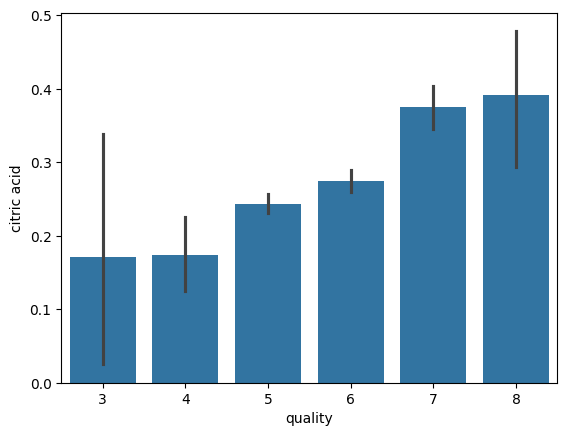

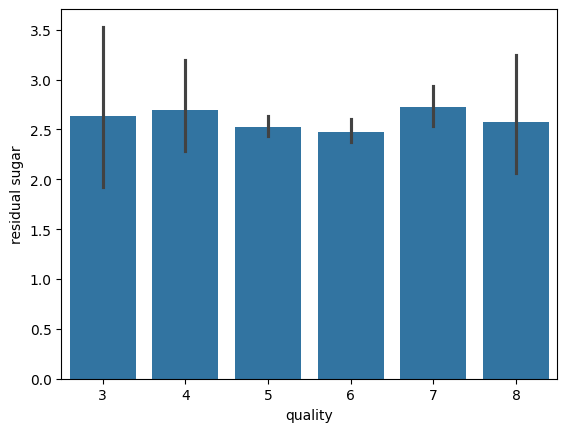

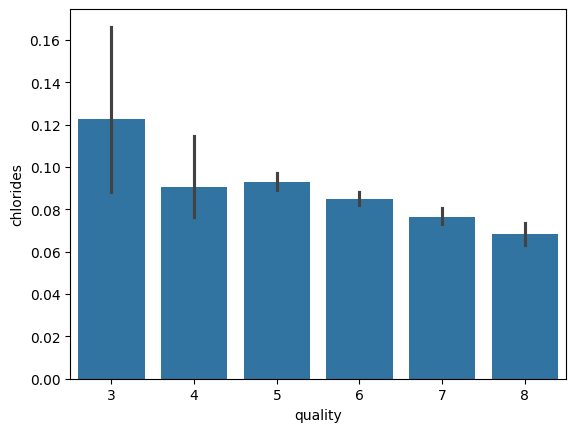

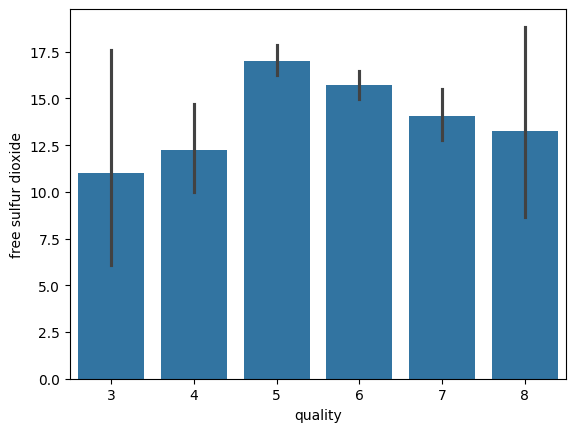

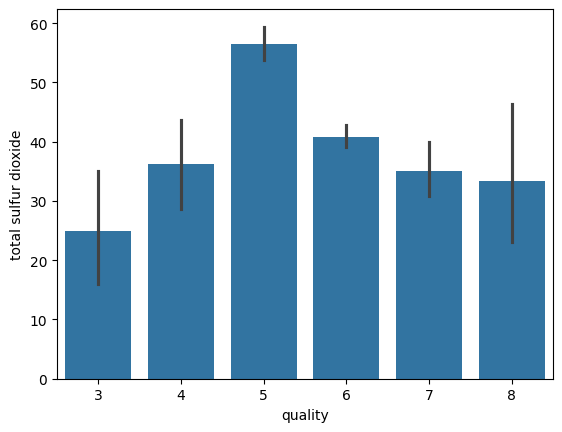

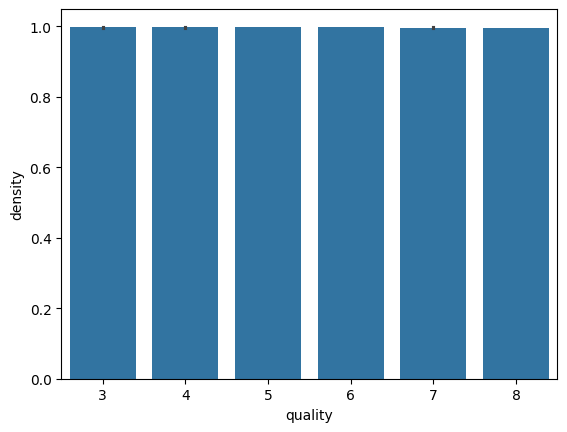

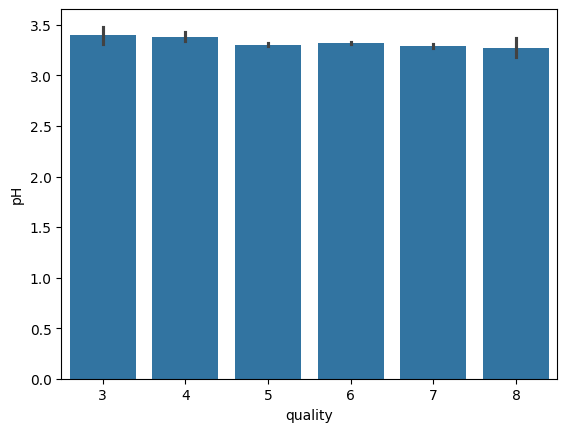

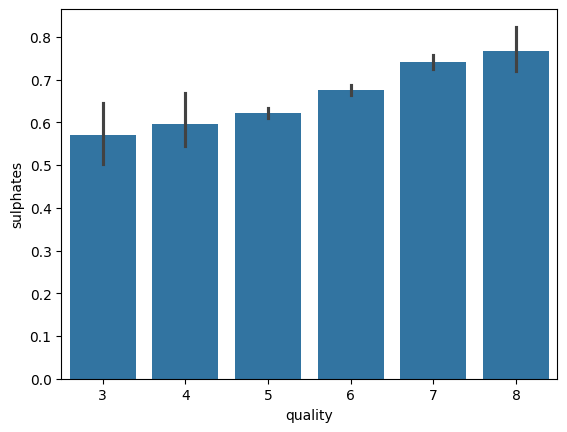

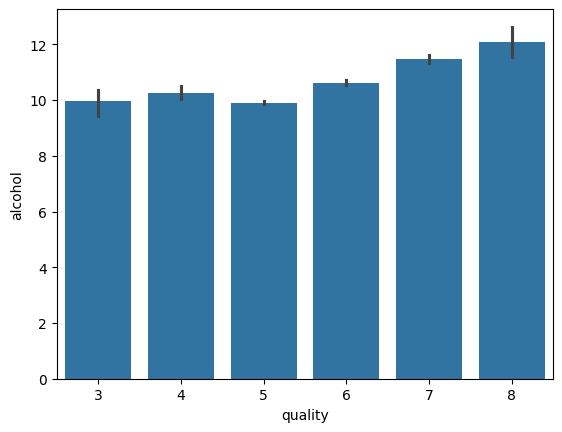

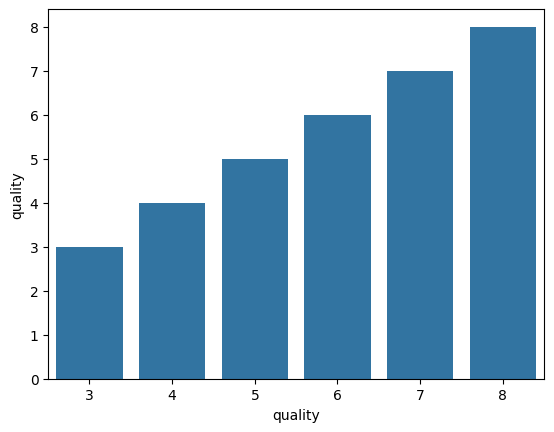

In [13]:
for i in df.columns:
    sns.barplot(data=df,y=df[i],x=df["quality"])
    plt.show()
    
    

In [14]:
# DataPreprocessing

In [15]:
df["quality"]=df["quality"].apply(lambda x: 1 if x>=6 else 0)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [16]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
model=RandomForestClassifier()
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)
accuracy_score(ypred,Ytest)

0.790625

In [21]:
print(X.head())
l=[X.apply(lambda x:x[902])]
result=model.predict(np.array(l).reshape(1,-1))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


/home/illahi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
if result[0]==1:
    print("GOOD QUALITY WINE")
else:
    print("BAD QUALITY WINE")

GOOD QUALITY WINE
